### Calcul des KPI clés

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Chargement des données
marketing_data = pd.read_excel('../../marketing_data_extended.xlsx')

# Calcul des indicateurs de performance
## Taux de clic en %
marketing_data['CTR'] = marketing_data['Clicks'] / marketing_data['Impressions'] * 100  
## Coût par clic
marketing_data['CPC'] = marketing_data['Budget'] / marketing_data['Clicks']  
## Coût par acquisition
marketing_data['CPA'] = marketing_data['Budget'] / marketing_data['Conversions']  
## Taux de conversion en %
marketing_data['Conversion_Rate'] = marketing_data['Conversions'] / marketing_data['Clicks'] * 100  
marketing_data['Month'] = pd.to_datetime(marketing_data['Start_Date']).dt.month_name()

# Affichage des indicateurs calculés
kpi_columns = ['Campaign_ID', 'Channel', 'Month', 'CTR', 'CPC', 'CPA', 'Conversion_Rate']
display(marketing_data[kpi_columns].round(2))

,Campaign_ID,Channel,Month,CTR,CPC,CPA,Conversion_Rate
0,11,Online,January,6.99,0.60,2.86,20.83
1,12,Social,January,2.05,2.33,22.73,10.23
2,13,Email,January,2.83,1.54,9.76,15.76
3,14,In-Store,January,3.80,1.32,9.35,14.10
4,15,TV,January,7.15,0.50,2.20,22.71
5,21,Online,February,9.11,0.69,3.25,21.13
6,22,Social,February,2.45,2.72,27.78,9.78
7,23,Email,February,2.04,2.44,15.15,16.14
8,24,In-Store,February,2.17,2.30,12.82,17.97
9,25,TV,February,4.20,0.99,7.41,13.41


### Analyse Comparative par Canal

Performance moyenne par canal:


,Budget,Impressions,Clicks,Conversions,CTR,CPC,CPA,Conversion_Rate
Channel,,,,,,,,
Online,9500,30250.00,1912.00,337.50,6.30,0.87,5.92,16.18
Email,9000,36000.00,2014.00,328.00,4.40,1.30,8.30,16.02
In-Store,11500,44833.33,2563.33,375.33,5.41,1.13,8.68,15.79
TV,8000,31416.67,1903.33,296.17,5.84,0.83,6.17,14.13
Social,7000,21500.00,1244.00,130.50,4.88,1.63,18.73,10.06


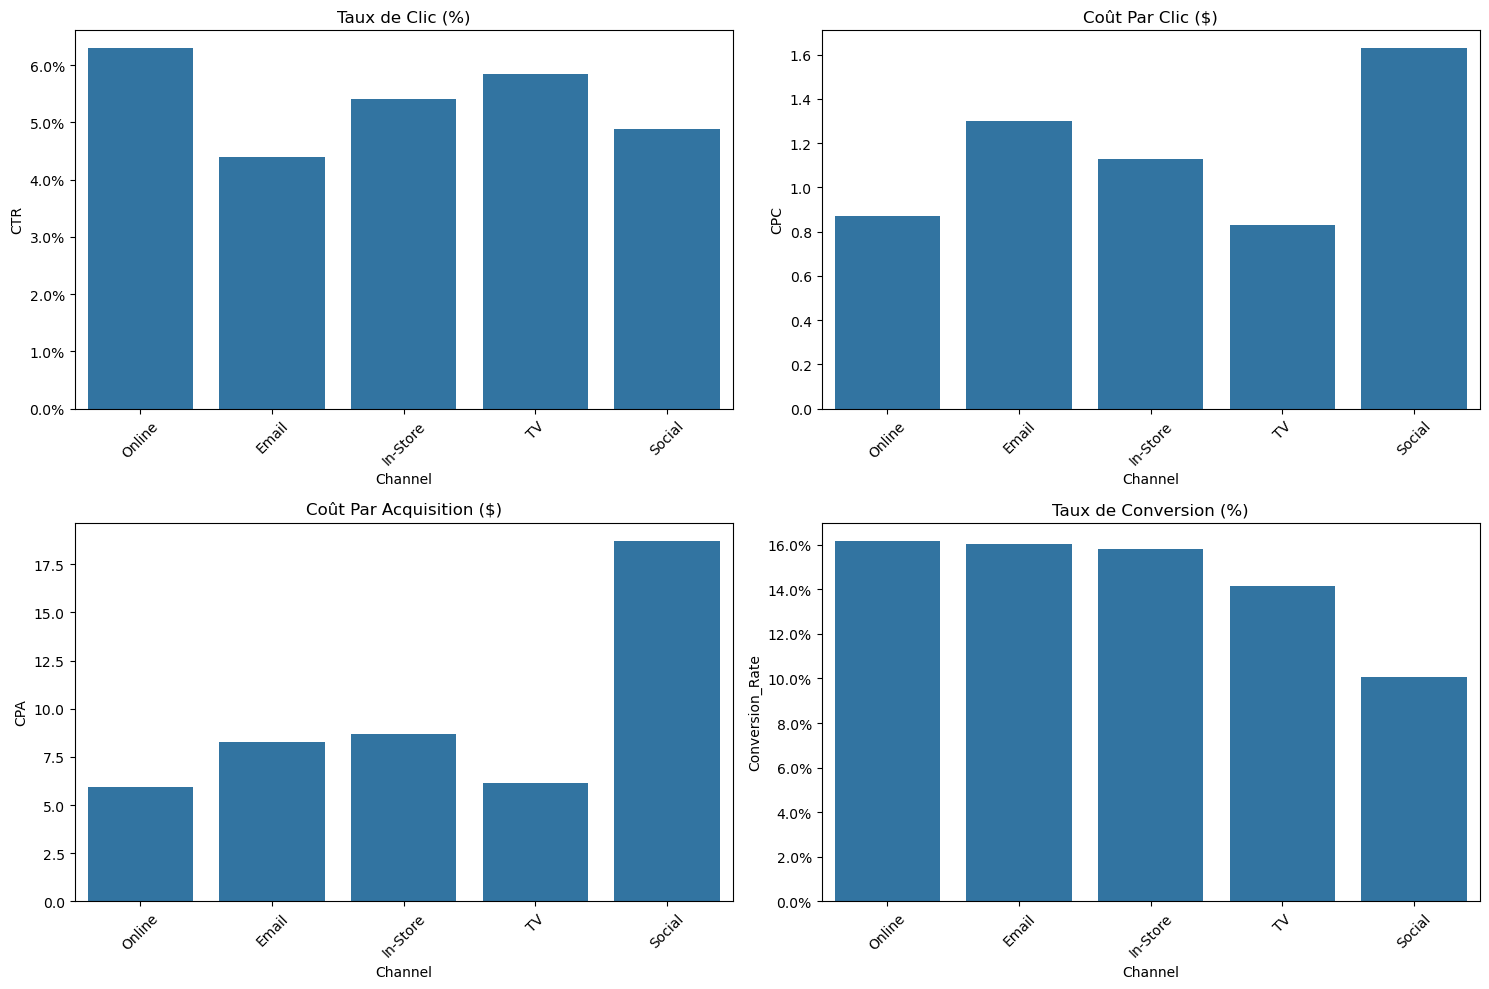

In [3]:
# Agrégation des données par canal
channel_performance = marketing_data.groupby('Channel').agg({
    'Budget': 'sum',
    'Impressions': 'mean',
    'Clicks': 'mean',
    'Conversions': 'mean',
    'CTR': 'mean',
    'CPC': 'mean',
    'CPA': 'mean',
    'Conversion_Rate': 'mean'
}).round(2)

# Tri par meilleur taux de conversion
channel_performance = channel_performance.sort_values('Conversion_Rate', ascending=False)
print("Performance moyenne par canal:")
display(channel_performance)

# Visualisation comparative
plt.figure(figsize=(15, 10))
metrics = ['CTR', 'CPC', 'CPA', 'Conversion_Rate']
titles = ['Taux de Clic (%)', 'Coût Par Clic ($)', 'Coût Par Acquisition ($)', 'Taux de Conversion (%)']

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=channel_performance.index, y=metric, data=channel_performance)
    plt.title(titles[i])
    plt.xticks(rotation=45)
    if metric in ['CTR', 'Conversion_Rate']:
        plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=1))

plt.tight_layout()
plt.show()

### Evolution Mensuelle des performances

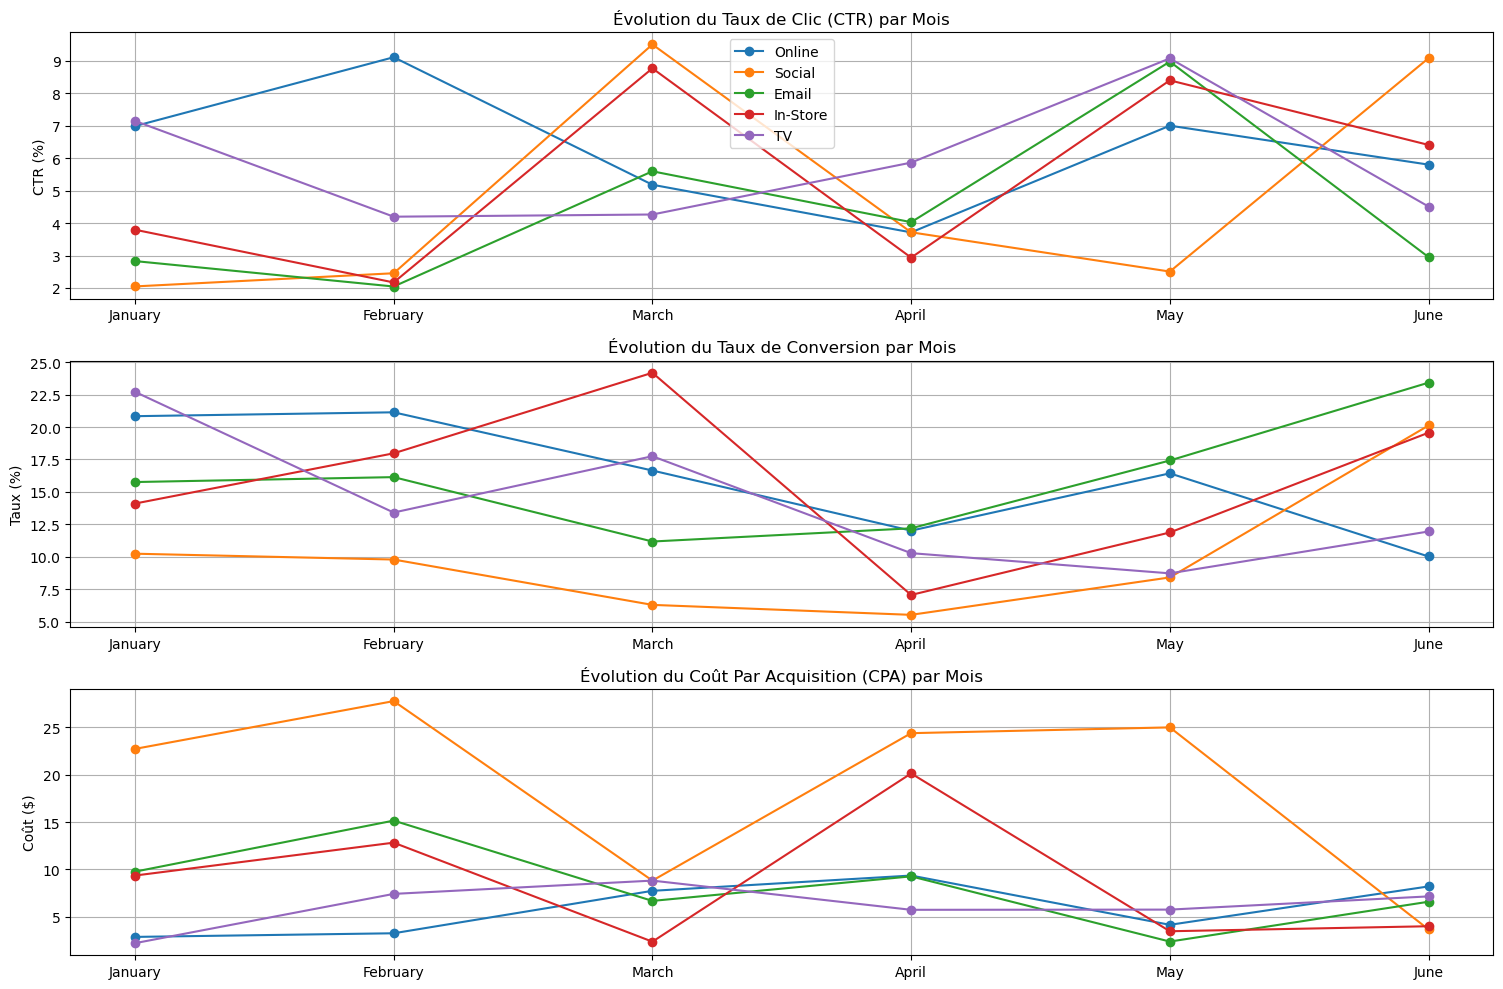

In [4]:
# Analyse temporelle
monthly_trends = marketing_data.groupby(['Month', 'Channel']).agg({
    'CTR': 'mean',
    'Conversion_Rate': 'mean',
    'CPA': 'mean'
}).unstack()

# Réorganisation des mois dans l'ordre chronologique
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
monthly_trends = monthly_trends.reindex(month_order)

# Visualisation des tendances
plt.figure(figsize=(15, 10))

# Tendance CTR
plt.subplot(3, 1, 1)
for channel in marketing_data['Channel'].unique():
    plt.plot(monthly_trends.index, monthly_trends[('CTR', channel)], label=channel, marker='o')
plt.title('Évolution du Taux de Clic (CTR) par Mois')
plt.ylabel('CTR (%)')
plt.legend()
plt.grid(True)

# Tendance Taux de Conversion
plt.subplot(3, 1, 2)
for channel in marketing_data['Channel'].unique():
    plt.plot(monthly_trends.index, monthly_trends[('Conversion_Rate', channel)], label=channel, marker='o')
plt.title('Évolution du Taux de Conversion par Mois')
plt.ylabel('Taux (%)')
plt.grid(True)

# Tendance CPA
plt.subplot(3, 1, 3)
for channel in marketing_data['Channel'].unique():
    plt.plot(monthly_trends.index, monthly_trends[('CPA', channel)], label=channel, marker='o')
plt.title('Évolution du Coût Par Acquisition (CPA) par Mois')
plt.ylabel('Coût ($)')
plt.grid(True)

plt.tight_layout()
plt.show()

## ROI

### ROI par canal 

Performance ROI par canal:


,Budget,CA_généré,ROI,Conversions,ROI_global
Channel,,,,,
Online,9500,202500,1995.28,2025,2031.58
In-Store,11500,225200,1897.22,2252,1858.26
TV,8000,177700,1886.11,1777,2121.25
Email,9000,196800,1567.50,1968,2086.67
Social,7000,78300,814.17,783,1018.57


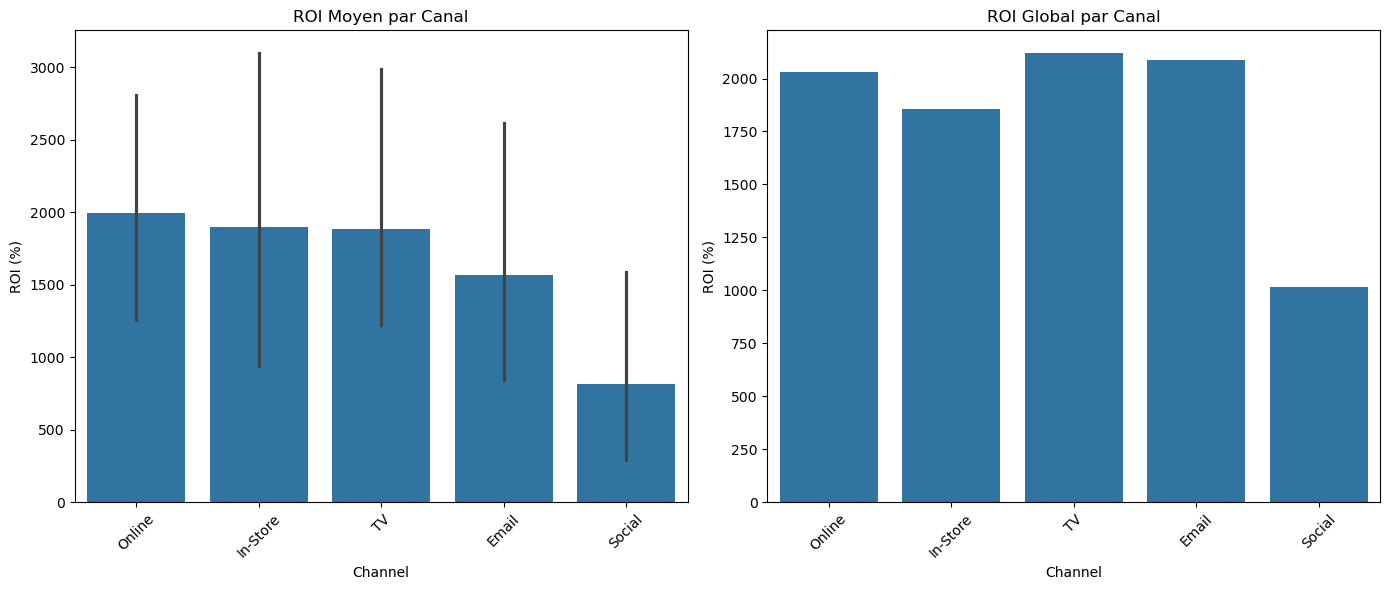

In [35]:
# Agrégation par canal
roi_by_channel = marketing_data.groupby('Channel').agg({
    'Budget': 'sum',
    'CA_généré': 'sum',
    'ROI': 'mean',
    'Conversions': 'sum'
}).sort_values('ROI', ascending=False)

# Calcul du ROI global
roi_by_channel['ROI_global'] = (roi_by_channel['CA_généré'] - roi_by_channel['Budget']) / roi_by_channel['Budget'] * 100

print("Performance ROI par canal:")
display(roi_by_channel.round(2))

plt.figure(figsize=(14, 6))

# ROI moyen par canal
plt.subplot(1, 2, 1)
sns.barplot(x='Channel', y='ROI', data=marketing_data, estimator=np.mean, order=roi_by_channel.index)
plt.title('ROI Moyen par Canal')
plt.ylabel('ROI (%)')
plt.xticks(rotation=45)

# ROI global par canal
plt.subplot(1, 2, 2)
sns.barplot(x='Channel', y='ROI_global', data=roi_by_channel.reset_index(), order=roi_by_channel.index)
plt.title('ROI Global par Canal')
plt.ylabel('ROI (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### ROI par mois et canal

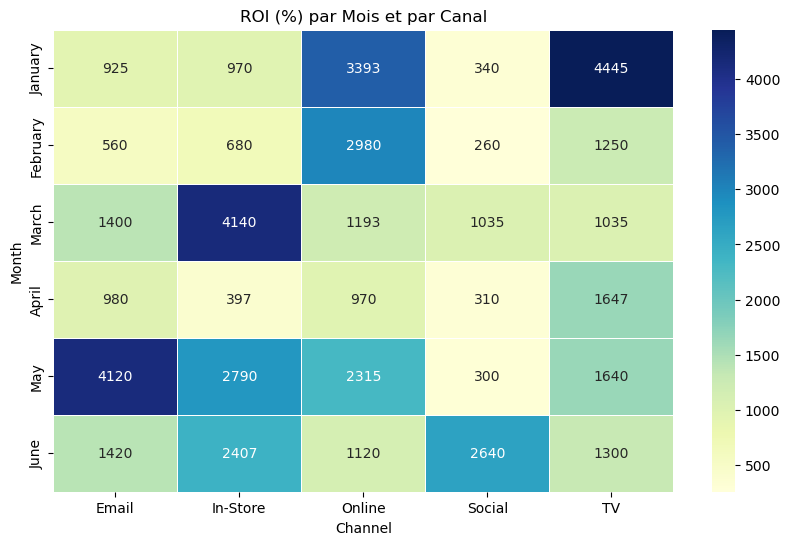

In [36]:
# Pivot table pour analyse temporelle
roi_pivot = marketing_data.pivot_table(index='Month', columns='Channel', values='ROI', aggfunc='mean')

# Réorganisation des mois dans l'ordre chronologique
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
roi_pivot = roi_pivot.reindex(month_order)

# Heatmap du ROI
plt.figure(figsize=(10, 6))
sns.heatmap(roi_pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('ROI (%) par Mois et par Canal')
plt.show()